# **Advanced Multi Layer Perceprton (MLP)**
This Experiment explores adavnced techniques for neural networks.


*   Weight Initialization.
*   Non linearilty (activation functions)
*   Optimizers
*   Batch Normalization
*   Dropout(Regularization)
*    Model Ensemble



In [ ]:
#Import useful libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

### **Load the MNIST dataset**
Source: http://yann.lecun.com/exdb/mnist/ 

In [ ]:
(X_train,y_train), (X_test,y_test)=mnist.load_data()

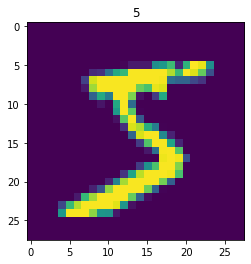

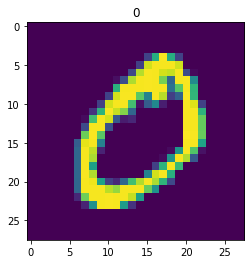

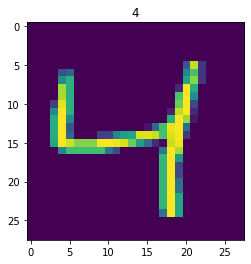

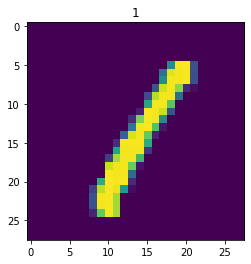

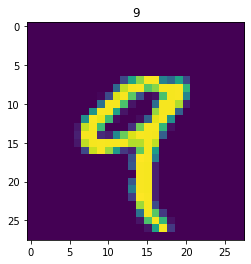

In [ ]:
#Display first 5 images from training data
for i in range(5):
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.show()


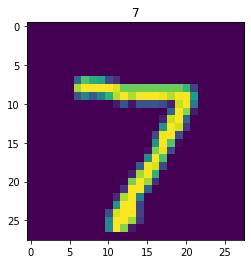

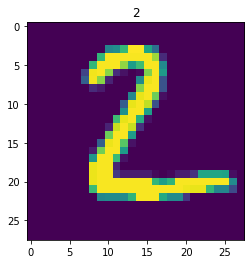

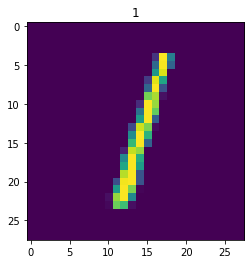

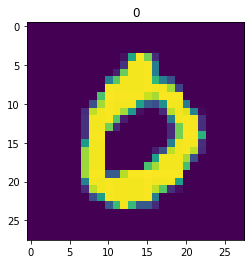

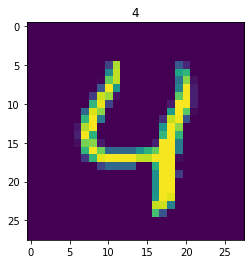

In [ ]:
#Display first 5 images from test data
for i in range(5):
  plt.imshow(X_test[i])
  plt.title(y_test[i])
  plt.show()

In [ ]:
#Print the shape of the images
print(X_train[0].shape)
print(X_train.shape)

(28, 28)
(60000, 28, 28)


In [ ]:
# reshaping X data: (n, 28, 28) => (n, 784) to fit to MLP
X_train=X_train.reshape((X_train.shape[0],-1))
print("Train set shape after reshaping {}".format(X_train.shape))
X_test = X_test.reshape((X_test.shape[0], -1))
print("Test set shape after reshaping {}".format(X_test.shape))

Train set shape after reshaping (60000, 784)
Test set shape after reshaping (10000, 784)


In [ ]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


## **Basic MLP model**

NOTE: Read abou diffeerent loss functions https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(50,input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

Read about 
* OPtimizers in Keras: https://keras.io/api/optimizers/
* Loss functions in Keras: https://keras.io/api/losses/ 
* How to select a loss function: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
* https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/

In [ ]:
opt= optimizers.SGD(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
165/165 [==============================] - 2s 10ms/step - loss: 2.3595 - accuracy: 0.0980 - val_loss: 2.3476 - val_accuracy: 0.0957
Epoch 2/100
165/165 [==============================] - 1s 9ms/step - loss: 2.3386 - accuracy: 0.1003 - val_loss: 2.3311 - val_accuracy: 0.0978
Epoch 3/100
165/165 [==============================] - 2s 9ms/step - loss: 2.3249 - accuracy: 0.1011 - val_loss: 2.3203 - val_accuracy: 0.0965
Epoch 4/100
165/165 [==============================] - 1s 9ms/step - loss: 2.3159 - accuracy: 0.0923 - val_loss: 2.3132 - val_accuracy: 0.0792
Epoch 5/100
165/165 [==============================] - 1s 9ms/step - loss: 2.3100 - accuracy: 0.0908 - val_loss: 2.3084 - val_accuracy: 0.0942
Epoch 6/100
165/165 [==============================] - 1s 8ms/step - loss: 2.3059 - accuracy: 0.1112 - val_loss: 2.3050 - val_accuracy: 0.1082
Epoch 7/100
165/165 [==============================] - 1s 9ms/step - loss: 2.3030 - accuracy: 0.1151 - val_loss: 2.3024 - val_accuracy: 0.108

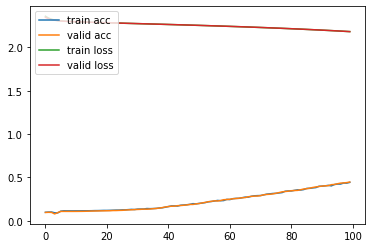

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

In [ ]:
out=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.1800 - accuracy: 0.4521


In [ ]:
print("Test Accuracy is: {}%".format(out[1]*100))

Test Accuracy is: 45.210000872612%


In [ ]:
#To print the weights of all layers of the model.
for layer in model.layers: print(layer.get_config(), layer.get_weights())

{'name': 'dense_155', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 50, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[-0.07286007, -0.02154541, -0.08157854, ...,  0.05795046,
        -0.06472541,  0.07981563],
       [ 0.04012664,  0.0378752 , -0.05541386, ...,  0.04936496,
         0.0577664 ,  0.05301965],
       [ 0.02693246,  0.03879601, -0.05777117, ...,  0.06992667,
        -0.002251  , -0.08239947],
       ...,
       [ 0.06585001,  0.00277486, -0.06628951, ...,  0.06050847,
         0.0405319 , -0.00635377],
       [ 0.06525964,  0.0207679 ,  0.02032112, ..., -0.07999896,
         0.06448296,  0.01865973],
       [-0.05861129, -0.0433891 ,  0.03853419, ..., -0.075962

In [ ]:
#If you want the weights directly returned as numpy arrays, you can use:

first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
print(first_layer_weights)

[[-0.07286007 -0.02154541 -0.08157854 ...  0.05795046 -0.06472541
   0.07981563]
 [ 0.04012664  0.0378752  -0.05541386 ...  0.04936496  0.0577664
   0.05301965]
 [ 0.02693246  0.03879601 -0.05777117 ...  0.06992667 -0.002251
  -0.08239947]
 ...
 [ 0.06585001  0.00277486 -0.06628951 ...  0.06050847  0.0405319
  -0.00635377]
 [ 0.06525964  0.0207679   0.02032112 ... -0.07999896  0.06448296
   0.01865973]
 [-0.05861129 -0.0433891   0.03853419 ... -0.07596271  0.0105629
   0.0498619 ]]


## **Weight Initialization**


*   Initializers define the way to set the initial random weights of Keras layers.
*  Changing weight initialization scheme can sometimes improve training of the model by preventing vanishing gradient problem up to some degree.
* He normal or Xavier normal initialization schemes are SOTA at the moment.
* Doc: https://keras.io/initializers/



In [ ]:
# Create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1313/1313 [==============================] - 5s 3ms/step - loss: 2.3387 - accuracy: 0.1032 - val_loss: 2.3021 - val_accuracy: 0.1097
Epoch 2/100
1313/1313 [==============================] - 3s 3ms/step - loss: 2.2971 - accuracy: 0.1146 - val_loss: 2.2957 - val_accuracy: 0.1080
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2930 - accuracy: 0.1144 - val_loss: 2.2921 - val_accuracy: 0.1079
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2896 - accuracy: 0.1146 - val_loss: 2.2890 - val_accuracy: 0.1082
Epoch 5/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2864 - accuracy: 0.1149 - val_loss: 2.2858 - val_accuracy: 0.1082
Epoch 6/100
1313/1313 [==============================] - 3s 3ms/step - loss: 2.2832 - accuracy: 0.1157 - val_loss: 2.2826 - val_accuracy: 0.1086
Epoch 7/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.2800 - accuracy: 0.1194 - val_loss: 2.2794 - val_accuracy: 0.10

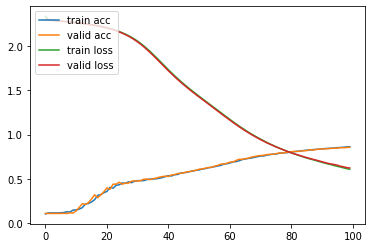

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

In [ ]:
out=model.evaluate(X_test,y_test)
print("Test Accuracy is: {}%".format(out[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.6271 - accuracy: 0.8598
Test Accuracy is: 85.97999811172485%


## **Non Linearity (Activation function)**
* Sigmoid functions suffer from gradient vanishing problem, making training slower
* There are many choices apart from sigmoid and tanh; try many of them!
* 'relu' (rectified linear unit) is one of the most popular ones
* 'selu' (scaled exponential linear unit) is one of the most recent ones
* Doc: https://keras.io/activations/

In [ ]:
def mlp_model():
    model=Sequential()
    model.add(Dense(50,input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation("relu"))
    model.add(Dense(50))
    model.add(Activation("relu"))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    opt=optimizers.SGD(lr = 0.001)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model



In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1313/1313 [==============================] - 5s 3ms/step - loss: 1.1525 - accuracy: 0.7749 - val_loss: 0.4989 - val_accuracy: 0.8668
Epoch 2/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4313 - accuracy: 0.8809 - val_loss: 0.4016 - val_accuracy: 0.8888
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3396 - accuracy: 0.9055 - val_loss: 0.3567 - val_accuracy: 0.9002
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2906 - accuracy: 0.9182 - val_loss: 0.3175 - val_accuracy: 0.9105
Epoch 5/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2600 - accuracy: 0.9245 - val_loss: 0.2984 - val_accuracy: 0.9173
Epoch 6/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2384 - accuracy: 0.9311 - val_loss: 0.2872 - val_accuracy: 0.9177
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2212 - accuracy: 0.9356 - val_loss: 0.2748 - val_accuracy: 0.92

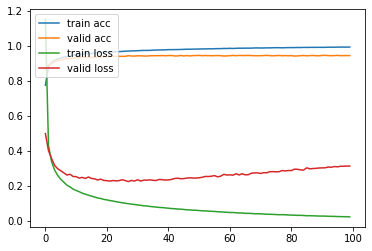

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [ ]:
out = model.evaluate(X_test, y_test)
print('Test accuracy is:{}% '.format(out[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.9441
Test accuracy is:94.4100022315979% 


## **Optimizers**

* Many variants of SGD are proposed and employed nowadays
* One of the most popular ones are Adam (Adaptive Moment Estimation)
* Doc: https://keras.io/optimizers/

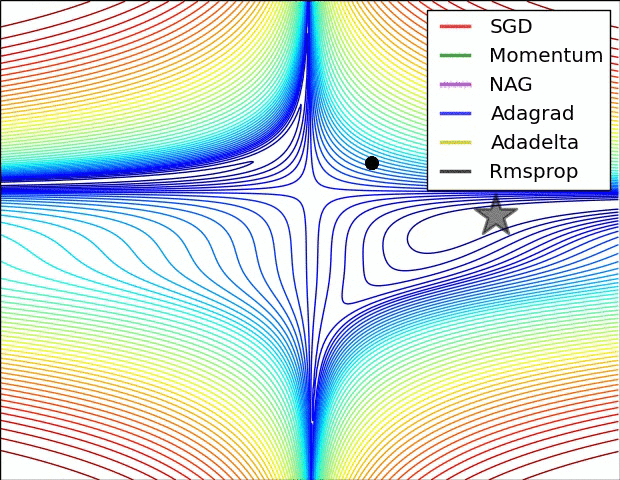

**Relative convergence speed of different optimizers**

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1313/1313 [==============================] - 20s 13ms/step - loss: 1.3170 - accuracy: 0.5631 - val_loss: 0.7358 - val_accuracy: 0.7807
Epoch 2/100
1313/1313 [==============================] - 14s 11ms/step - loss: 0.6289 - accuracy: 0.8064 - val_loss: 0.5365 - val_accuracy: 0.8353
Epoch 3/100
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5160 - accuracy: 0.8437 - val_loss: 0.4888 - val_accuracy: 0.8495
Epoch 4/100
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4709 - accuracy: 0.8570 - val_loss: 0.4622 - val_accuracy: 0.8608
Epoch 5/100
1313/1313 [==============================] - 11s 8ms/step - loss: 0.4484 - accuracy: 0.8638 - val_loss: 0.4431 - val_accuracy: 0.8657
Epoch 6/100
1313/1313 [==============================] - 11s 9ms/step - loss: 0.4257 - accuracy: 0.8713 - val_loss: 0.3984 - val_accuracy: 0.8807
Epoch 7/100
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3888 - accuracy: 0.8814 - val_loss: 0.386

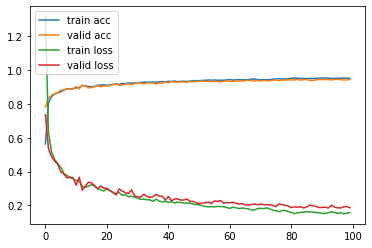

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1]*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1829 - accuracy: 0.9439
Test accuracy:  94.38999891281128


## **Batch Normalization**

https://analyticsindiamag.com/understanding-normalization-methods-in-deep-learning/#:~:text=Batch%20normalization%20reduces%20the%20internal,without%20the%20risk%20of%20divergence

* Popular normalization methods used for training deep learning models.
*  It enables faster and stable training of deep neural networks by stabilising the distributions of layer inputs during the training phase.
*  This approach is mainly related to **internal covariate shift (ICS)** .
* ICS: **Chang**e in the distribution of **layer inputs** caused when the **preceding layers are updated**. It is important to reduce the internal co-variant shift. 
* Batch normalization reduces ICS by adding network layers which control the means and variances of the layer inputs. 

**Advantages**


1.   Batch normalization reduces the internal covariate shift (ICS) and accelerates the training of a deep neural network
2.   This approach reduces the dependence of gradients on the scale of the parameters or of their initial values which result in higher learning rates without the risk of divergence

Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [ ]:
from keras.layers import BatchNormalization

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    opt=optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
model=mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 [==============================] - 6s 4ms/step - loss: 2.0398 - accuracy: 0.4010 - val_loss: 1.7664 - val_accuracy: 0.5969
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.6597 - accuracy: 0.6447 - val_loss: 1.5134 - val_accuracy: 0.7209
Epoch 3/100
1313/1313 [==============================] - 6s 4ms/step - loss: 1.4602 - accuracy: 0.7273 - val_loss: 1.3420 - val_accuracy: 0.7808
Epoch 4/100
1313/1313 [==============================] - 6s 4ms/step - loss: 1.3201 - accuracy: 0.7700 - val_loss: 1.2155 - val_accuracy: 0.8147
Epoch 5/100
1313/1313 [==============================] - 6s 4ms/step - loss: 1.2069 - accuracy: 0.7992 - val_loss: 1.1108 - val_accuracy: 0.8390
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1196 - accuracy: 0.8167 - val_loss: 1.0309 - val_accuracy: 0.8511
Epoch 7/100
1313/1313 [==============================] - 6s 4ms/step - loss: 1.0435 - accuracy: 0.8288 - val_loss: 0.9588 - val_ac

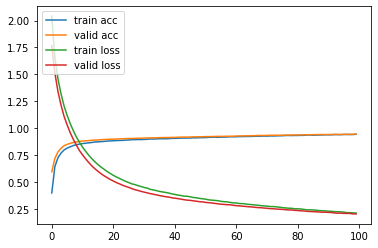

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs



In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1979 - accuracy: 0.9460


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9459999799728394


## **Dealing with Overfitting**

### **1) Dropout (Regularization)**

Every unit of our neural network (except those belonging to the output layer) is given the probability p of being temporarily ignored in calculations. 

![url](https://miro.medium.com/max/918/1*064lT1SXq_6F7uoc00V1fw.gif)

Reference: https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a



*   Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. It is not used on the output layer.
*   A new hyperparameter is introduced that specifies the probability at which outputs of the layer are dropped out, or inversely, the probability at which outputs of the layer are retained.
* A common value is a probability of 0.5 for retaining the output of each node in a hidden laye and a value close to 1.0, such as 0.8, for retaining inputs from the visible layer. 
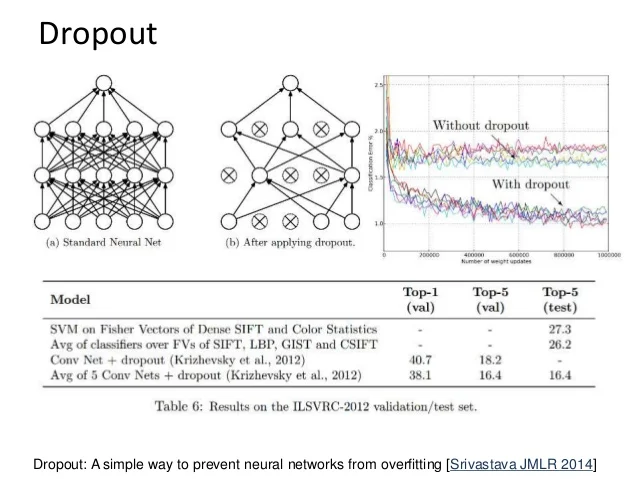



In [ ]:
from keras.layers import Dropout

In [ ]:
def mlp_model():
  model=Sequential()
  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('sigmoid'))    
  model.add(Dropout(0.2))                        # Dropout layer after Activation
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.2))                        # Dropout layer after Activation
  model.add(Dense(50))
  model.add(Activation('sigmoid'))    
  model.add(Dropout(0.2))                        # Dropout layer after Activation
  model.add(Dense(50))
  model.add(Activation('sigmoid'))    
  model.add(Dropout(0.2))                         # Dropout layer after Activation
  model.add(Dense(10))
  model.add(Activation('softmax'))

  opt=optimizers.SGD(lr=0.001)
  model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model
    

In [ ]:
model=mlp_model()
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 50)                39250     
                                                                 
 activation_82 (Activation)  (None, 50)                0         
                                                                 
 dropout_24 (Dropout)        (None, 50)                0         
                                                                 
 dense_87 (Dense)            (None, 50)                2550      
                                                                 
 activation_83 (Activation)  (None, 50)                0         
                                                                 
 dropout_25 (Dropout)        (None, 50)                0         
                                                                 
 dense_88 (Dense)            (None, 50)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(X_train,y_train,validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.4047 - accuracy: 0.1017 - val_loss: 2.3055 - val_accuracy: 0.1076
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3480 - accuracy: 0.1034 - val_loss: 2.3010 - val_accuracy: 0.1079
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3437 - accuracy: 0.1044 - val_loss: 2.3002 - val_accuracy: 0.1079
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3447 - accuracy: 0.1005 - val_loss: 2.2998 - val_accuracy: 0.1079
Epoch 5/100
1313/1313 [==============================] - 6s 5ms/step - loss: 2.3453 - accuracy: 0.1019 - val_loss: 2.2992 - val_accuracy: 0.1079
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3399 - accuracy: 0.1050 - val_loss: 2.2985 - val_accuracy: 0.1079
Epoch 7/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3344 - accuracy: 0.1069 - val_loss: 2.2980 - val_ac

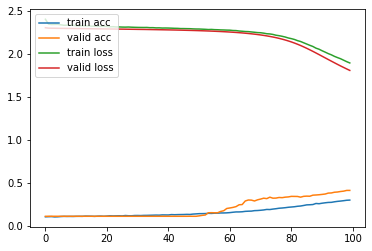

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

The validation results do not improve because there are no signs of overfitting at this time.
As a result, the key takeaway message is to use dropout when an overfitting signal is detected.

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8019 - accuracy: 0.4041


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4041000008583069


### **2)Early Stopping**
Interrupt the learning process before the model starts overfitting
![url](https://miro.medium.com/max/1050/1*iANsamYbzkuUwIBWDP21GQ.gif)

Change in accuracy values calculated on the test and cross-validation sets during subsequent iterations of learning process. 

Refer the documentations:
*  https://keras.io/api/callbacks/early_stopping/

* https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
* https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd

**Using the same model in the previous experiment [Droput]**


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
# monitor: Quantity to be monitored.
#patience: Number of epochs with no improvement after which training will be stopped

In [ ]:
def mlp_model():
  model=Sequential()
  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('sigmoid'))    
  model.add(Dropout(0.2))                        # Dropout layer after Activation
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.2))                        # Dropout layer after Activation
  model.add(Dense(50))
  model.add(Activation('sigmoid'))    
  model.add(Dropout(0.2))                        # Dropout layer after Activation
  model.add(Dense(50))
  model.add(Activation('sigmoid'))    
  model.add(Dropout(0.2))                         # Dropout layer after Activation
  model.add(Dense(10))
  model.add(Activation('softmax'))

  opt=optimizers.SGD(lr=0.001)
  model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model
model=mlp_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(X_train,y_train,validation_split = 0.3, epochs = 100, callbacks=[callback],verbose = 1)

Epoch 1/100
1313/1313 [==============================] - 6s 4ms/step - loss: 2.3672 - accuracy: 0.1022 - val_loss: 2.3016 - val_accuracy: 0.1079
Epoch 2/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3524 - accuracy: 0.1008 - val_loss: 2.2996 - val_accuracy: 0.1079
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3524 - accuracy: 0.1039 - val_loss: 2.2986 - val_accuracy: 0.1079
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3470 - accuracy: 0.1044 - val_loss: 2.2978 - val_accuracy: 0.1079


In [ ]:
print("The model ran for {} epochs".format(len(history.history['loss'])))

The model ran for 4 epochs


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='min', verbose=1, patience=5)
# monitor: Quantity to be monitored.
#patience: Number of epochs with no improvement after which training will be stopped

In [ ]:
history=model.fit(X_train,y_train,validation_split = 0.3, epochs = 100, callbacks=[callback],verbose = 1)

Epoch 1/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3386 - accuracy: 0.1073 - val_loss: 2.2942 - val_accuracy: 0.1079
Epoch 2/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3340 - accuracy: 0.1124 - val_loss: 2.2935 - val_accuracy: 0.1079
Epoch 3/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3342 - accuracy: 0.1072 - val_loss: 2.2928 - val_accuracy: 0.1079
Epoch 4/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3331 - accuracy: 0.1088 - val_loss: 2.2921 - val_accuracy: 0.1079
Epoch 5/100
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3286 - accuracy: 0.1116 - val_loss: 2.2914 - val_accuracy: 0.1079
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3262 - accuracy: 0.1095 - val_loss: 2.2907 - val_accuracy: 0.1079
Epoch 00006: early stopping


In [ ]:
print("The model ran for {} epochs".format(len(history.history['loss'])))

The model ran for 6 epochs


In [ ]:
#MOdel Training with custom callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):                         # stop when the accuracy is 90%  if(logs.get('accuracy')>0.9)
      print("Loss is low so cancelling tarining: ")
      self.model.stop_training=True
# use callback=myCallback      

### **3)Model Ensemble**

* Model ensemble is a reliable and promising way to boost performance of the model
* Usually create 8 to 10 independent networks and merge their results
* Here, we resort to scikit-learn API, VotingClassifier
* Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html


In [ ]:
import numpy as np

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)]
                                , voting = 'soft')

In [ ]:
history=ensemble_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
y_pred = ensemble_clf.predict(X_test)

In [ ]:
print('Test accuracy:', accuracy_score(y_pred, y_test))


Test accuracy: 0.8565


### **Checkpointing in Keras**
* The EarlyStopping callback will stop training once triggered, but the model at the end of training may not be the model with best performance on the validation dataset.
* An additional callback is required that will save the best model observed during training for later use. This is the **ModelCheckpoint callback**.


In [ ]:
#Saving and loading models requires that HDF5 support has been installed on your workstation.
pip install h5py

The callback will save the model to file, which requires that a path and filename be specified via the first argument.

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
#specify the “mode” as either minimizing or maximizing the performance measure
#we are interested in only the very best model observed during training, rather than the best compared to the previous epoch, 
#which might not be the best overall if training is noisy. This can be achieved by setting the “save_best_only” argument to True.

In [ ]:
# load a saved model
from keras.models import load_model
saved_model = load_model('best_model.h5')

### **Experiment**

1. Use all of the methods discussed to improve training and generalization on MNIST dataset
>> * Weight Initialization scheme (Use he normal)
>> * Nonlinearity (Activation function)
>> * Optimizers(adaptive)
>> * Batch Normalization
>> * Dropout (Regularization)
>> * Early stopping, Model checkpoint
>> * Model Ensemble

     Compare the result of the new model against the baseline and writedown your inferences.
2. Repeat experiment 1 on any other classification dataset from UCI machine learning repository: http://archive.ics.uci.edu/ml/index.php.      
